# Data Exploration 

In the data exploration phase, our objective is two fold:

1. Undertand the data
2. Understand the typical profile of an item that has went on back order in eight weeks in the past

### 1. Data Understanding

To understand the data we'll:

a. Explore missing data, outliers, important feature correlations

b. Explore data distributions


### 2. Back Order Profile Understanding

a. We'll segment the data to identify any features that are unique to items that went on back order in the past

b. Use these features to train our back order classification model. 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
from helpers import helpers
from sklearn.utils import resample
import warnings
#import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('derived_data/train_data.csv')
df.shape

(1519074, 23)

# Data Understanding

In [5]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
0,2268897,2172.0,8.0,345.0,3515.0,6899.0,10283.0,1167.0,3621.0,7045.0,10546.0,904.0,0.0,0.52,0.47,0.0,0,0,0,1,1,0,0
1,2978254,30.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,7.0,2.0,0.0,1.00,0.98,0.0,0,0,0,0,1,0,0
2,2235941,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.82,0.81,0.0,0,0,0,0,1,0,0
3,2014918,3.0,8.0,0.0,20.0,30.0,50.0,2.0,21.0,53.0,60.0,0.0,0.0,0.86,0.88,0.0,0,0,0,0,1,0,0
4,3023180,480.0,8.0,78.0,537.0,1441.0,2287.0,181.0,575.0,1629.0,2419.0,164.0,0.0,1.00,0.98,0.0,0,0,0,0,1,0,0


# Exploring Data Types

In [6]:
#Df feature datatypes
df.dtypes

sku                       object
national_inv             float64
lead_time                float64
in_transit_qty           float64
forecast_3_month         float64
forecast_6_month         float64
forecast_9_month         float64
sales_1_month            float64
sales_3_month            float64
sales_6_month            float64
sales_9_month            float64
min_bank                 float64
pieces_past_due          float64
perf_6_month_avg         float64
perf_12_month_avg        float64
local_bo_qty             float64
potential_issue_Yes        int64
deck_risk_Yes              int64
oe_constraint_Yes          int64
ppap_risk_Yes              int64
stop_auto_buy_Yes          int64
rev_stop_Yes               int64
went_on_backorder_Yes      int64
dtype: object

# Scale of Measurement
### Nominal
    *  sku, potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, went_on_backorder

### Ratio
    * national_inv, lead_time (in weeks), in_transit_qty, forecast_3_month, forecast_6_month, forecast_9_month,
        sales_1_month, sales_3_month, sales_6_month,  sales_9_month, min_bank, pieces_past_due, 
        perf_6_month_avg, perf_12_month_avg, local_bo_qty

## Roles in Analysis
### Labels
    * sku
### Descriptors
    * All columns but sku and went_on_backorder
### Target (i.e. Response)
    * went_on_backorder

In [7]:
#Convert features to correct datatypes
df['sku'] = df['sku'].astype('category') #to give this feature a unique datatype
df['potential_issue_Yes'] = df['potential_issue_Yes'].astype(str)
df['deck_risk_Yes'] = df['deck_risk_Yes'].astype(str)
df['oe_constraint_Yes'] = df['oe_constraint_Yes'].astype(str)
df['ppap_risk_Yes'] = df['ppap_risk_Yes'].astype(str)
df['stop_auto_buy_Yes'] = df['stop_auto_buy_Yes'].astype(str)
df['rev_stop_Yes'] = df['rev_stop_Yes'].astype(str)
df['went_on_backorder_Yes'] = df['went_on_backorder_Yes'].astype(str)

# EDA for Numerical Features

## Frequency Distributions

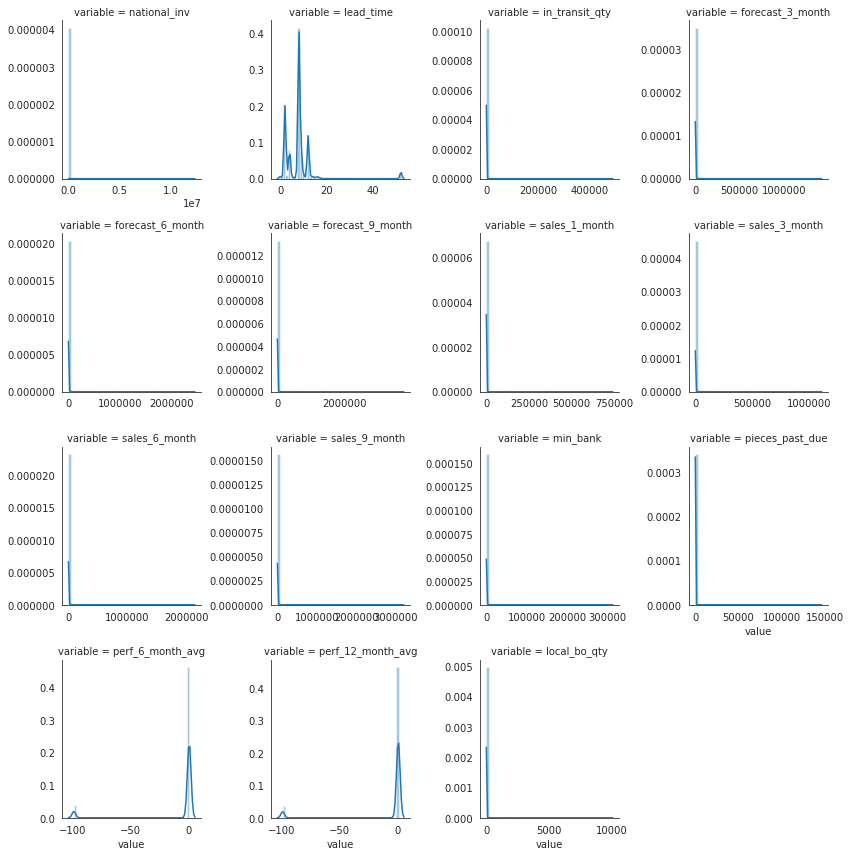

In [7]:
#plot numeric column distributions
helpers.ColumnTypes.histograms_numeric_columns(df)

* Most binary features are imbalanced
* We'll fix this later through upsampling the target variable

# Summarize Numerical Features

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
national_inv,1519073.0,495.992439,29067.123473,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1428211.0,7.868617,7.050977,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1519073.0,43.605469,1285.816749,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1519073.0,177.506483,4940.675364,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1519073.0,343.646590,9563.998096,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1519073.0,503.956653,13990.731847,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1519073.0,55.752810,1916.045931,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1519073.0,173.703502,5053.650401,0.0,0.00,1.00,15.00,1104181.0
sales_6_month,1519073.0,339.158395,9330.568716,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1519073.0,521.762210,14428.767877,0.0,0.00,4.00,46.00,3204929.0


* There are possible rows missing values in our dataset
* We'll investigate further later

# EDA for Categorical Features

## Summarize Categorical Features

In [9]:
df.describe(include=['object'])

,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
count,1519074,1519074,1519074,1519074,1519074,1519074,1519074
unique,2,2,2,2,2,2,2
top,0,0,0,0,1,0,0
freq,1518255,1170072,1518853,1335802,1464029,1518437,1508910


## Display Categorical Class Distributions

potential_issue_Yes


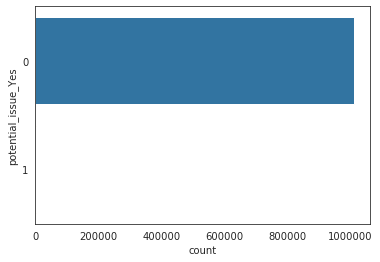

deck_risk_Yes


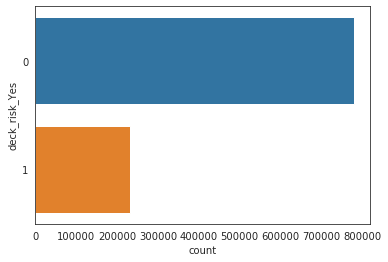

oe_constraint_Yes


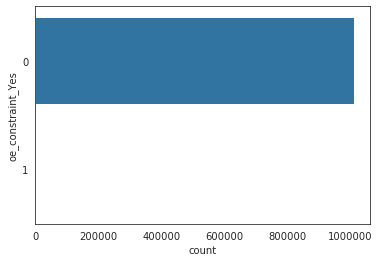

ppap_risk_Yes


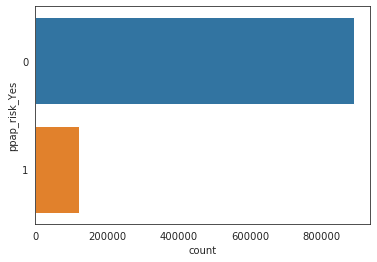

stop_auto_buy_Yes


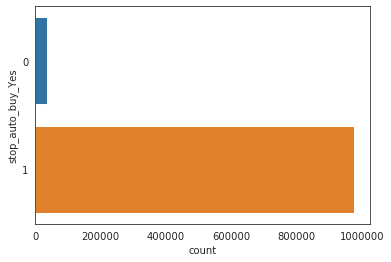

rev_stop_Yes


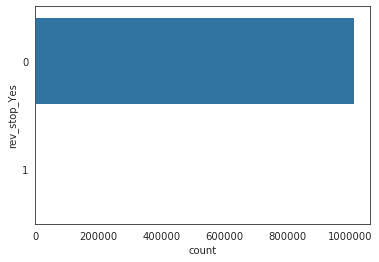

went_on_backorder_Yes


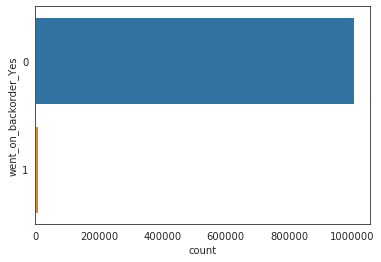

In [9]:
#Listing categorical features in the data set (using the series mask method)
type_series = df.dtypes
series_mask = type_series == object

#Displaying class distributions for all categorical features in our dataset
for n in type_series[series_mask].index:
    print(n)
    
    # Get Bar Plots
    sns.countplot(y= n, data=df)
    plt.show()

Let's view proportions of some selected categories

In [10]:
pd.DataFrame(df.potential_issue_Yes.value_counts())

,potential_issue_Yes
0,1518255
1,819


In [11]:
pd.DataFrame(df.rev_stop_Yes.value_counts())

,rev_stop_Yes
0,1518437
1,637


In [12]:
pd.DataFrame(df.oe_constraint_Yes.value_counts())

,oe_constraint_Yes
0,1518853
1,221


In [13]:
pd.DataFrame(df.went_on_backorder_Yes.value_counts())

,went_on_backorder_Yes
0,1508910
1,10164


In [14]:
by_backorder = df.groupby('deck_risk_Yes').went_on_backorder_Yes.value_counts(normalize=True)
by_backorder.unstack()

went_on_backorder_Yes,0,1
deck_risk_Yes,,
0,0.992784,0.007216
1,0.995069,0.004931


It seems that most categorical variables won't be useful to our model because of low value counts.

Let's get another view of the target distribution on our categorical variables.

In [15]:
#Get categorical feats only dataframe
categoricals_df = df[['potential_issue_Yes',
                      'deck_risk_Yes',
                      'oe_constraint_Yes',
                      'ppap_risk_Yes',
                      'stop_auto_buy_Yes',
                      'rev_stop_Yes',
                      'went_on_backorder_Yes']]

In [16]:
categoricals_df.sample(5)

,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
1266711,0,0,0,0,1,0,0
768769,0,0,0,0,1,0,0
207969,0,0,0,1,1,0,0
513732,0,1,0,0,1,0,0
292781,0,1,0,0,1,0,0


In [17]:
#Convert datatypes to numerical to aid analysis
categoricals_df['potential_issue_Yes'] = categoricals_df['potential_issue_Yes'].astype(int)
categoricals_df['deck_risk_Yes'] = categoricals_df['deck_risk_Yes'].astype(int)
categoricals_df['oe_constraint_Yes'] = categoricals_df['oe_constraint_Yes'].astype(int)
categoricals_df['ppap_risk_Yes'] = categoricals_df['ppap_risk_Yes'].astype(int)
categoricals_df['stop_auto_buy_Yes'] = categoricals_df['stop_auto_buy_Yes'].astype(int)
categoricals_df['rev_stop_Yes'] = categoricals_df['rev_stop_Yes'].astype(int)
categoricals_df['went_on_backorder_Yes'] = categoricals_df['went_on_backorder_Yes'].astype(int)


#Confirm change
print(categoricals_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519074 entries, 0 to 1519073
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype
---  ------                 --------------    -----
 0   potential_issue_Yes    1519074 non-null  int64
 1   deck_risk_Yes          1519074 non-null  int64
 2   oe_constraint_Yes      1519074 non-null  int64
 3   ppap_risk_Yes          1519074 non-null  int64
 4   stop_auto_buy_Yes      1519074 non-null  int64
 5   rev_stop_Yes           1519074 non-null  int64
 6   went_on_backorder_Yes  1519074 non-null  int64
dtypes: int64(7)
memory usage: 81.1 MB
None


In [18]:
categoricals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519074 entries, 0 to 1519073
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype
---  ------                 --------------    -----
 0   potential_issue_Yes    1519074 non-null  int64
 1   deck_risk_Yes          1519074 non-null  int64
 2   oe_constraint_Yes      1519074 non-null  int64
 3   ppap_risk_Yes          1519074 non-null  int64
 4   stop_auto_buy_Yes      1519074 non-null  int64
 5   rev_stop_Yes           1519074 non-null  int64
 6   went_on_backorder_Yes  1519074 non-null  int64
dtypes: int64(7)
memory usage: 81.1 MB


In [19]:
pd.DataFrame(categoricals_df.groupby('went_on_backorder_Yes', as_index=False).sum())

,went_on_backorder_Yes,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
0,0,771,347281,213,181692,1454286,637
1,1,48,1721,8,1580,9743,0


We can observe from above that some categorical features feature like 'rev_stop_Yes' and 'oe_constraint_Yes' could be feeder variables that should be removed from our model.

We'll note this and make decisions later when we perform more statistical analyses. 

# Duplicates

In [19]:
#Are there any duplicate columns?
helpers.check_dups(df)

No duplicates found


# Missing Values

In [20]:
#Are there any missing values
helpers.check_missing(df)


***************** Total and Percentage of Missing Values Found *****************

                   Total       Percent
lead_time          90863  5.981473e-02
min_bank               1  6.582958e-07
sales_1_month          1  6.582958e-07
national_inv           1  6.582958e-07
in_transit_qty         1  6.582958e-07
forecast_3_month       1  6.582958e-07
forecast_6_month       1  6.582958e-07
local_bo_qty           1  6.582958e-07
perf_12_month_avg      1  6.582958e-07
perf_6_month_avg       1  6.582958e-07
pieces_past_due        1  6.582958e-07
forecast_9_month       1  6.582958e-07
sales_9_month          1  6.582958e-07
sales_6_month          1  6.582958e-07
sales_3_month          1  6.582958e-07


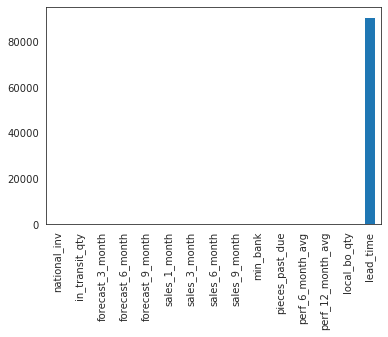

In [22]:
#Vizualize the proportion of missing values by feature
helpers.plot_missing(df)

In [23]:
#Get columns with over specific threshold percent
helpers.view_many_missing(df, 0.03)


******************* Features with over 0.03 percent missing ********************



['lead_time']

The 'lead_time' feature has 60,442 missing values and one obervation with all features missing.

Before we decide on how we'll handle these columns with missing data, we need to:

    1. Identify possible reason for missingness
    2. Identify any obvious missingness patterns
    3. Then decide on how we'll handle these missing values on each specific columns

In [24]:
#Are the same rows missing the same information?
#Setting n =15 as we have at least 1 record with all 15 columns missing
helpers.view_missing_by_row(df, 15)


**************** 1519074 rows with missing data found in dataset****************

 1 Rows with 15 records missing found


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes,missing
1335900,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,15


In [25]:
#View the index row
df.iloc[1335900]

sku                      (1687860 rows)
national_inv                        NaN
lead_time                           NaN
in_transit_qty                      NaN
forecast_3_month                    NaN
forecast_6_month                    NaN
forecast_9_month                    NaN
sales_1_month                       NaN
sales_3_month                       NaN
sales_6_month                       NaN
sales_9_month                       NaN
min_bank                            NaN
pieces_past_due                     NaN
perf_6_month_avg                    NaN
perf_12_month_avg                   NaN
local_bo_qty                        NaN
potential_issue_Yes                   0
deck_risk_Yes                         0
oe_constraint_Yes                     0
ppap_risk_Yes                         0
stop_auto_buy_Yes                     0
rev_stop_Yes                          0
went_on_backorder_Yes                 0
Name: 1335900, dtype: object

We can clearly see that identified 15 missing values above are all from this same observation.

In [27]:
#Are there any rows with null lead_time and did go on back-order?
df.loc[(df['went_on_backorder_Yes'] == 1) & (df['lead_time'].isnull())]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes


No observations found with null lead_time and did go on back-order

We'll see if lead_time is a helpfull feature for our analysis and mark these as missing lead_time if so.

We'll handle some of these missing values for EDA purposes manually now, but build a transformer that will handle these two steps automatically during data modeling.

## Handling Missing Values

In [28]:
df.shape

(1519074, 23)

In [31]:
#drop row with index 1335900
df = df.drop(1335900)

print(df.shape)

(1519073, 23)


## Non Unique  Values

In [17]:
#Are there any columns with non unique values?
helpers.check_non_unique(df)

No columns with non unique values found


## Sparse Classes

In [ ]:
#Are there any categorical features with cardinality?
helpers.CheckCardinality.check_sparse_classes(df, plots =False)

However, from the histogram plots above, we know that we do have sparse (unbalanced) classes

This method did not identify them because those columns are encoded as numeric datatypes

We will fix these unbalanced classes as needed later in our project.

# Outliers

## 1. Univariate Outlier Analysis

Here we'll check for outliers on selected numerical variables 

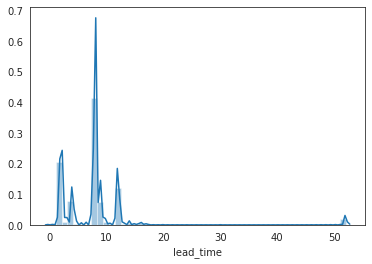

In [31]:
#Outliers on 'lead_time'
sns.distplot(df['lead_time'])

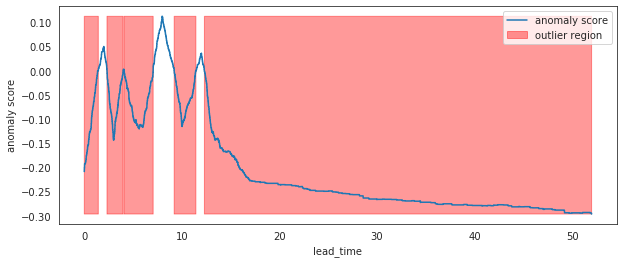

In [37]:
#check outlier bounderies
helpers.visualize_outlier_regions('lead_time', df)

In [38]:
#let's vizualize some outliers
df.loc[df['lead_time'] > 20]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
93,2870748,17.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.67,0.42,0.0,0,1,0,1,0,0,0
132,1116445,189.0,52.0,0.0,0.0,0.0,0.0,6.0,31.0,63.0,94.0,16.0,0.0,1.00,0.97,0.0,0,1,0,0,1,0,0
167,3031224,779.0,52.0,0.0,0.0,0.0,0.0,6.0,37.0,69.0,104.0,27.0,0.0,0.95,0.96,0.0,0,1,0,0,1,0,0
369,2288047,10.0,52.0,0.0,0.0,0.0,0.0,1.0,6.0,7.0,10.0,0.0,0.0,0.98,0.93,0.0,0,1,0,0,1,0,0
554,2900515,5000.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.94,0.87,0.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012362,1921081,6.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.62,0.62,0.0,0,1,0,0,0,0,0
1012386,3172347,277.0,52.0,0.0,0.0,0.0,0.0,3.0,10.0,19.0,24.0,2.0,0.0,0.91,0.95,0.0,0,1,0,0,1,0,0
1012419,3036648,642.0,52.0,0.0,0.0,0.0,0.0,3.0,13.0,32.0,54.0,129.0,0.0,-99.00,-99.00,0.0,0,1,0,0,0,0,0
1012653,3195787,26033.0,24.0,40.0,0.0,0.0,0.0,148.0,468.0,1034.0,1691.0,162.0,0.0,0.88,0.89,0.0,0,0,0,1,1,0,0


In [64]:
#Get 5 largest 'lead_time' values
df.nlargest(5, 'lead_time')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
93,2870748,17.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.67,0.42,0.0,0,1,0,1,0,0,0
132,1116445,189.0,52.0,0.0,0.0,0.0,0.0,6.0,31.0,63.0,94.0,16.0,0.0,1.00,0.97,0.0,0,1,0,0,1,0,0
167,3031224,779.0,52.0,0.0,0.0,0.0,0.0,6.0,37.0,69.0,104.0,27.0,0.0,0.95,0.96,0.0,0,1,0,0,1,0,0
369,2288047,10.0,52.0,0.0,0.0,0.0,0.0,1.0,6.0,7.0,10.0,0.0,0.0,0.98,0.93,0.0,0,1,0,0,1,0,0
554,2900515,5000.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.94,0.87,0.0,0,1,0,0,0,0,0


In [65]:
#Get 5 smallest 'lead_time'values
df.nsmallest(5, 'lead_time')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
60,1627178,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0
190,1582908,2.0,0.0,0.0,1.0,3.0,4.0,0.0,2.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
537,1471256,13.0,0.0,0.0,0.0,2.0,6.0,8.0,27.0,56.0,76.0,2.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
565,1470537,3.0,0.0,0.0,0.0,0.0,0.0,7.0,19.0,36.0,49.0,13.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0
635,1650098,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


It seem's lead_time is recorded in number of weeks

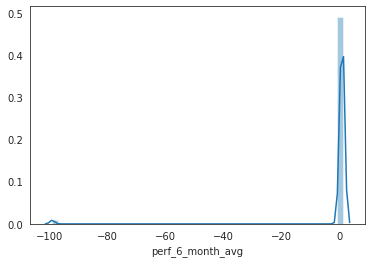

In [13]:
#Outliers on 'perf_6_month_avg'
sns.distplot(df['perf_6_month_avg'])

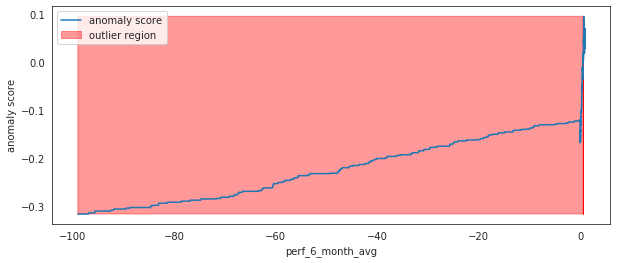

In [14]:
#check outlier bounderies
helpers.visualize_outlier_regions('perf_6_month_avg', df)

In [68]:
#let's vizualize some outliers
df['perf_6_month_avg'][df['perf_6_month_avg'] < -80]

4         -99.0
40        -99.0
46        -99.0
56        -99.0
69        -99.0
           ... 
1012679   -99.0
1012686   -99.0
1012699   -99.0
1012701   -99.0
1012703   -99.0
Name: perf_6_month_avg, Length: 77700, dtype: float64

In [70]:
#Get 5 largest 'perf_6_month_avg' values
df.nlargest(5, 'perf_6_month_avg')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
1,1263257,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.93,0.0,0,0,0,1,1,0,0
37,1570948,11.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,7.0,3.0,0.0,1.0,1.00,0.0,0,0,0,0,1,0,0
52,2227399,98.0,8.0,0.0,0.0,0.0,0.0,1.0,11.0,26.0,46.0,20.0,0.0,1.0,0.99,0.0,0,0,0,0,1,0,0
65,3132364,22.0,8.0,0.0,23.0,44.0,65.0,9.0,18.0,44.0,63.0,0.0,0.0,1.0,1.00,0.0,0,0,0,0,1,0,0
78,2143003,75.0,2.0,24.0,90.0,156.0,228.0,31.0,96.0,199.0,299.0,44.0,0.0,1.0,1.00,0.0,0,0,0,0,1,0,0


In [71]:
#Get 5 smallest 'perf_6_month_avg' values
df.nsmallest(5, 'perf_6_month_avg')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
4,1144102,9.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,-99.0,-99.0,0.0,0,1,0,0,1,0,0
40,2252655,2316.0,NaN,0.0,0.0,0.0,0.0,2.0,19.0,49.0,68.0,53.0,0.0,-99.0,-99.0,0.0,0,1,0,0,1,0,0
46,2071541,779.0,NaN,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,-99.0,-99.0,0.0,0,1,0,0,1,0,0
56,3081235,150.0,NaN,0.0,0.0,0.0,0.0,3.0,6.0,8.0,11.0,1.0,0.0,-99.0,-99.0,0.0,0,1,0,0,1,0,0
69,1182581,3.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,-99.0,0.0,0.0,0,1,0,1,1,0,0


-99 seem to denote missing on performance 12 and 6 months average features.

Let's:

    1. Count how many are missing among these two features, and
    2. Check if here are any backorders among these missing values.

In [117]:
#How many observations have perf_12_month_avg missing?
len(df[(df['perf_12_month_avg'] == -99)])

97820

In [118]:
#How many observations have perf_6_month_avg missing?
len(df[(df['perf_6_month_avg'] == -99)])

103757

In [120]:
#How many observations have both 'perf_12_month_avg' and 'perf_6_month_avg' missing?
len(df[(df['perf_12_month_avg'] == -99)&(df['perf_6_month_avg'] == -99)])

97820

In [126]:
#What percentage of these are missing from entire dataframe?
missing = round(len(df[(df['perf_12_month_avg'] == -99)&(df['perf_6_month_avg'] == -99)])/ len(df)*100, 2)
print('Percent Missing: %s %%\n' % missing)

Percent Missing: 7.24 %



In [127]:
#How many backorder observations have both 'perf_12_month_avg' and 'perf_6_month_avg' missing?
len(df[(df['perf_12_month_avg'] == -99)&(df['perf_6_month_avg'] == -99)\
      &(df['went_on_backorder_Yes'] == 1)])

306

Because not a significant portion of these are missing, we will remove these observations with missing values in case perf_12_month_avg or perf_6_month_avg turn to be impacful features to our model.

We'll handle this during data preprocessing.

# Inspecting the Target Variable

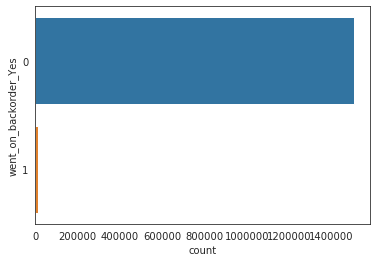

In [32]:
# Bar plot for 'went_on_backorder'
sns.countplot(y='went_on_backorder_Yes', data=df)
plt.show()

* We have an imbalanced data set
* We'll handle this data imbalance later when ready for modeling.

# Correlations

Are there any variables with significant linear correlation with our target variable?

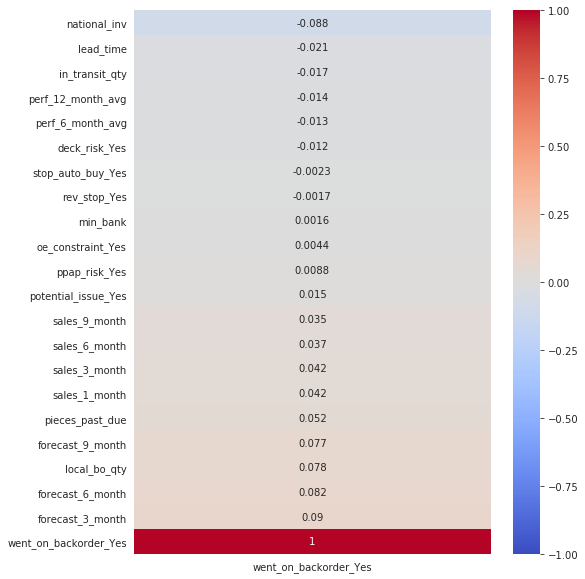

In [34]:
#Correlation of numerical variables with the target variable
helpers.heatmap_numeric_w_dependent_variable(df, 'spearman', 'went_on_backorder_Yes')

It does not appear that any features are significantly correlated with the target variable.

Let's assess correlations after dropping missing values

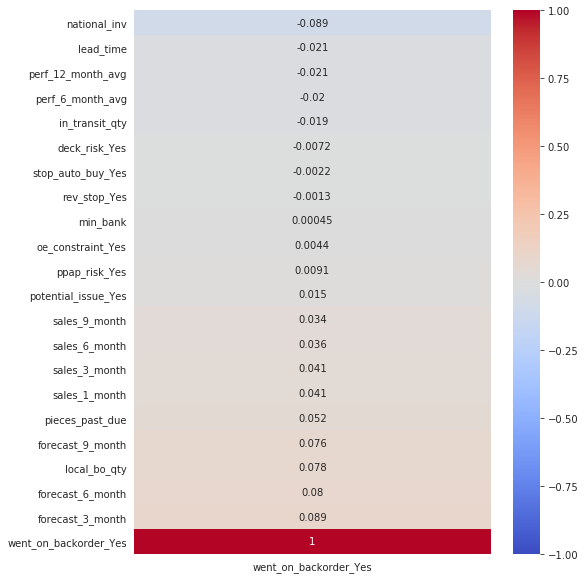

In [35]:
#Get correlation dataframe
corr_df = df.dropna(axis=0)

helpers.heatmap_numeric_w_dependent_variable(corr_df, 'spearman', 'went_on_backorder_Yes')

In [36]:
corr_df.shape

(1428211, 23)

# Multicollinearity

The presence of multicollinear variables can adversly impact the performance of our model.

Are there any multicolliner variables?

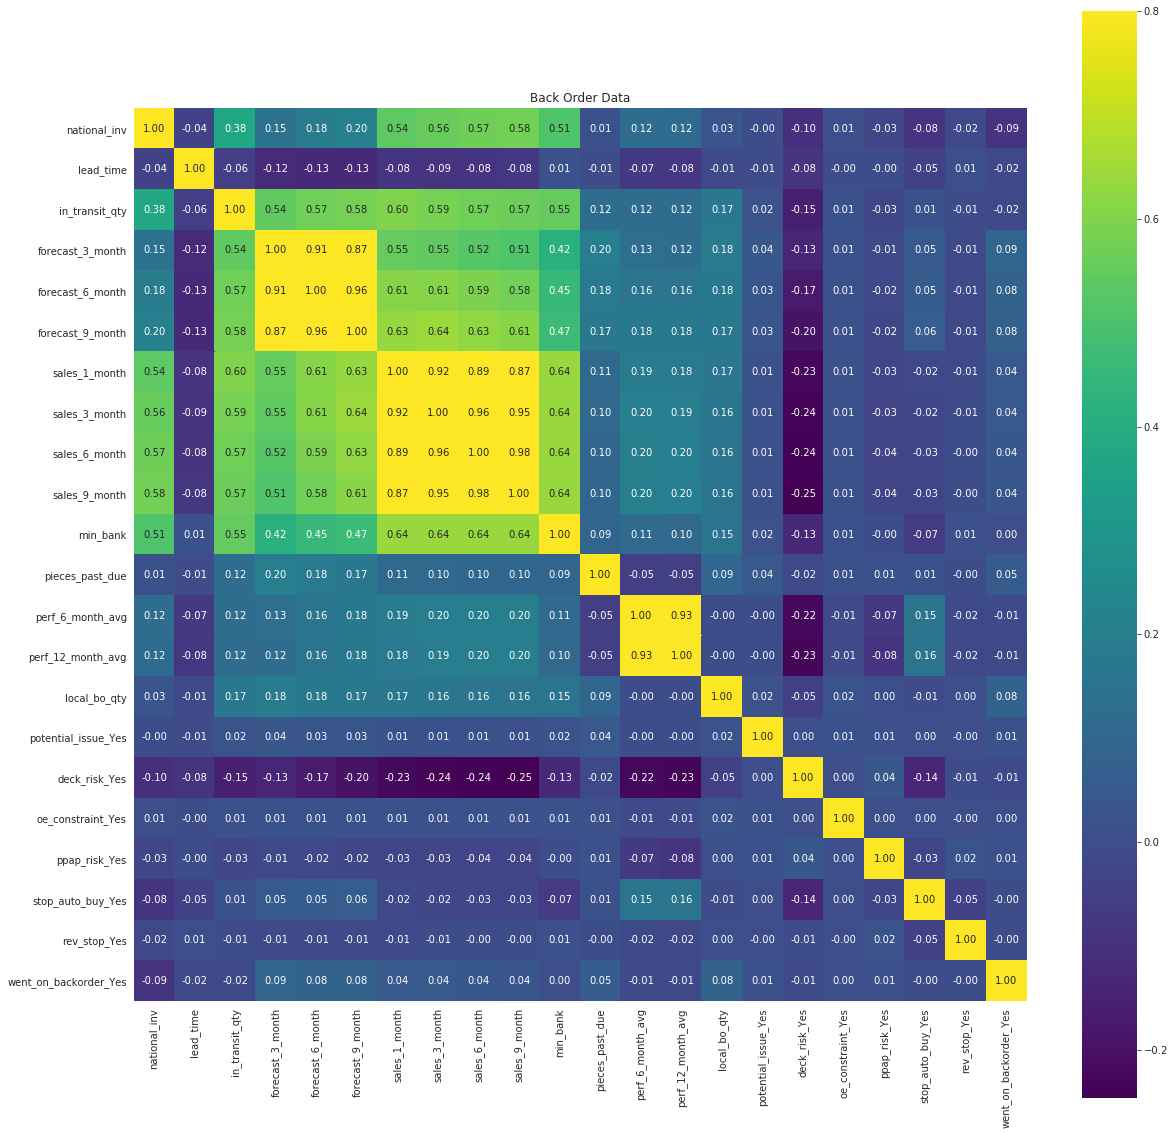

In [37]:
#We'll use the 'spearman' method because of the presence of categorical variables in our dataset
df_corr = df.corr(method= 'spearman')

plt.figure(figsize=(20,20))

sns.heatmap(df_corr, vmax=.8, square=True, 
            annot=True, fmt='.2f', cmap = 'viridis')

plt.title('Back Order Data')

plt.show()

In [38]:
#Let's get multicollinear features
helpers.get_multicollinear_feats(df, target = 'went_on_backorder_Yes')

{'forecast_6_month',
 'forecast_9_month',
 'min_bank',
 'perf_12_month_avg',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month'}

We'll remove one of these variables per pair with high multicollinearity from our dataset.

Note that 'min_bank' is identified because it does not appear to have any linear relationship with the target variable.

Removing the variable that is least correlated with the target variable from each evaluated pair.

## Handling Multicollinear Variables

In [39]:
#Delete one of the identified multicollinear features
del df['forecast_6_month']
del df['forecast_9_month']
del df['perf_12_month_avg']
del df['min_bank']
del df['sales_6_month']
del df['sales_9_month']
del df['sales_1_month']

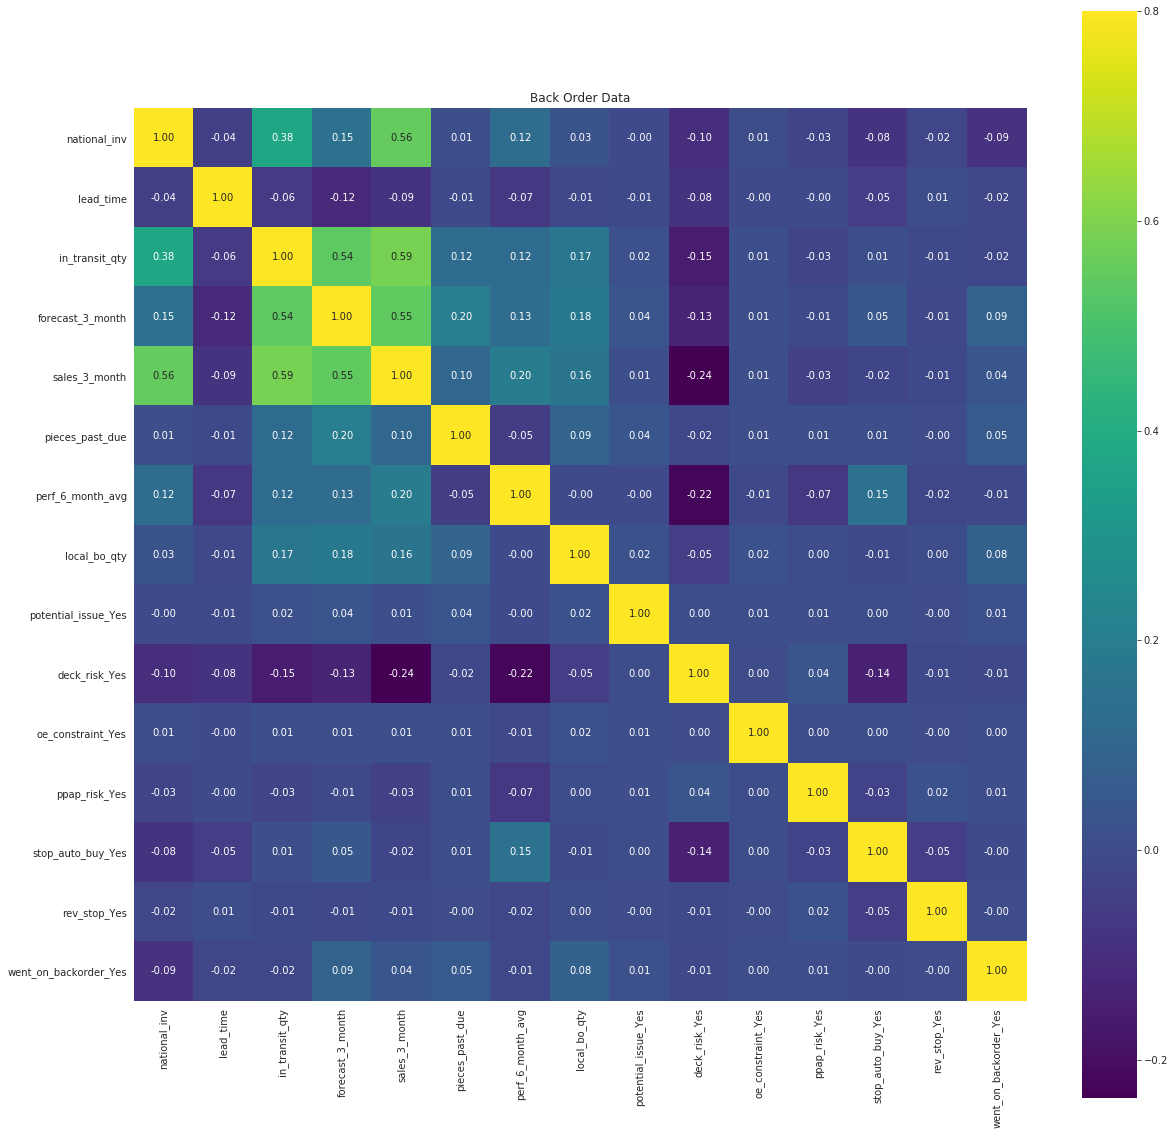

In [40]:
#sanity check multicollinearity
#We'll use the 'spearman' method because of the presence of categorical variables in our dataset
df_corr = df.corr(method= 'spearman')

plt.figure(figsize=(20,20))

sns.heatmap(df_corr, vmax=.8, square=True, 
            annot=True, fmt='.2f', cmap = 'viridis')

plt.title('Back Order Data')

plt.show()

# Saving our Analytical Base Table (ABT)

In [41]:
abt = df

In [42]:
abt.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_3_month,pieces_past_due,perf_6_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
0,2268897,2172.0,8.0,345.0,3515.0,3621.0,0.0,0.52,0.0,0,0,0,1,1,0,0
1,2978254,30.0,8.0,0.0,0.0,2.0,0.0,1.00,0.0,0,0,0,0,1,0,0
2,2235941,1.0,8.0,0.0,0.0,0.0,0.0,0.82,0.0,0,0,0,0,1,0,0
3,2014918,3.0,8.0,0.0,20.0,21.0,0.0,0.86,0.0,0,0,0,0,1,0,0
4,3023180,480.0,8.0,78.0,537.0,575.0,0.0,1.00,0.0,0,0,0,0,1,0,0


In [43]:
print(abt.shape)

(1519073, 16)


Writing our abt to a csv for easier importing on our next steps

In [44]:
abt.to_csv('derived_data/train_data_abt.csv', index=False)